In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/visual_qa/

Mounted at /content/gdrive
/content/gdrive/MyDrive/visual_qa


In [2]:
input_json='data/data_prepro.json'
input_img_h5='data/data_img.h5'
input_ques_h5='data/data_prepro.h5'

In [3]:
import h5py
data_ques = h5py.File(input_ques_h5,'r')
data_img = h5py.File(input_img_h5,'r')

import json
file = open(input_json)
data_dict = json.load(file)

In [34]:
md = 4
epch = 50
md_name = "trained_models/"+"model_"+str(md)+"_"+"epoch_"+str(epch)

In [36]:
from keras.models import model_from_json

json_file = open(md_name+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(md_name+".hdf5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
i = 11224
part = "test"
# print(data_ques["MC_ans_"+][i])
# print(data_ques["ques_"+part][i])
print("Question ID:", data_ques["question_id_"+part][i])
# for j in data_ques["MC_ans_"+part][i]:
#   if j==0:
#     continue
#   print(data_dict["ix_to_ans"][str(j)], end=" ")
# print("\n---------------------")
for j in data_ques["ques_"+part][i]:
  if j==0:
    break
  print(data_dict["ix_to_word"][str(j)], end= " ")

Question ID: 5087870
what is the boy holding ? 

In [22]:
q = ["what", "is", "there", "on", "the", "child", "head", "?"]

In [23]:
import numpy as np
inv_dict = {v:k for (k,v) in data_dict['ix_to_word'].items()}
feat = []
for w in q:
  try:
    feat.append(int(inv_dict[w]))
  except:
    feat.append(int(0))

for x in range(26-len(q)):
  feat.append(0)

feat = np.array(feat).reshape((1, -1))
print(feat)

[[11106  6749 10970 10940  3713   525 10185  6069     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]]


In [24]:
import numpy as np
batch = [i]
X_ques = feat ##np.array(data_ques['ques_'+part][batch])
X_img_pos = np.array(data_ques['img_pos_'+part][batch]) - 1
X_imgs = np.zeros((1, 4096))
X_imgs[0, :] = np.array(data_img['images_'+part][X_img_pos[0]])

In [25]:
# print(np.array(data_ques['ques_'+part][batch]))

In [26]:
out = loaded_model.predict([X_imgs, X_ques])

In [27]:
out.shape

(1, 1001)

In [28]:
for label in reversed(np.argsort(out)[0,-5:]):
    print(str(round(out[0,label]*100,2)).zfill(5), "% ", data_dict["ix_to_ans"][str(label)])

36.25 %  hat
07.93 %  helmet
005.3 %  flower
02.07 %  hair
01.72 %  cup


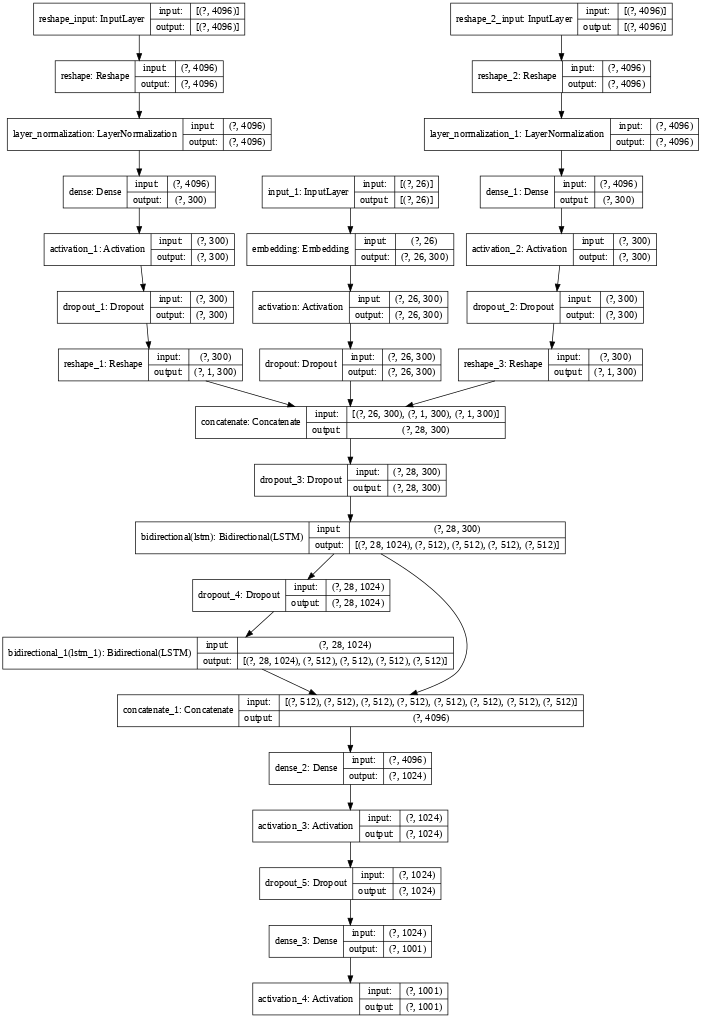

In [37]:
import tensorflow as tf 
tf.keras.utils.plot_model(
    loaded_model,
    show_shapes=True,
    to_file="model"+str(md)+".png",
    # show_dtype=False,
    # show_layer_names=True,
    # rankdir="TB",
    # expand_nested=False,
    dpi=50,
)

In [ ]:
# test_generator = DataGenerator(part='test')

In [ ]:
# predict = loaded_model.predict(test_generator)


In [ ]:
# part = "test"
# results = []
# for i in range((data_ques['ques_'+part].shape[0])//32):
#   batch = [j for j in range(i*32,(i+1)*32)]
#   X_ques = np.array(data_ques['ques_'+part][batch])
#   X_img_pos = np.array(data_ques['img_pos_'+part][batch]) - 1
#   X_imgs = np.zeros((32, 4096))
#   for i in range(32):
#           X_imgs[i, :] = np.array(data_img['images_'+part][X_img_pos[i]]) #comment for ablation study language only
#   out = loaded_model.predict([X_imgs, X_ques])
#   print(out.shape)
#   out = np.argsort(out)[-1]
#   result = {}
#   for o in out:
#     data_ques["question_id_"+part][i]
#   print([data_dict["ix_to_ans"][str(o)] if o!=0 else "UNK" for o in out ])